# Task 1
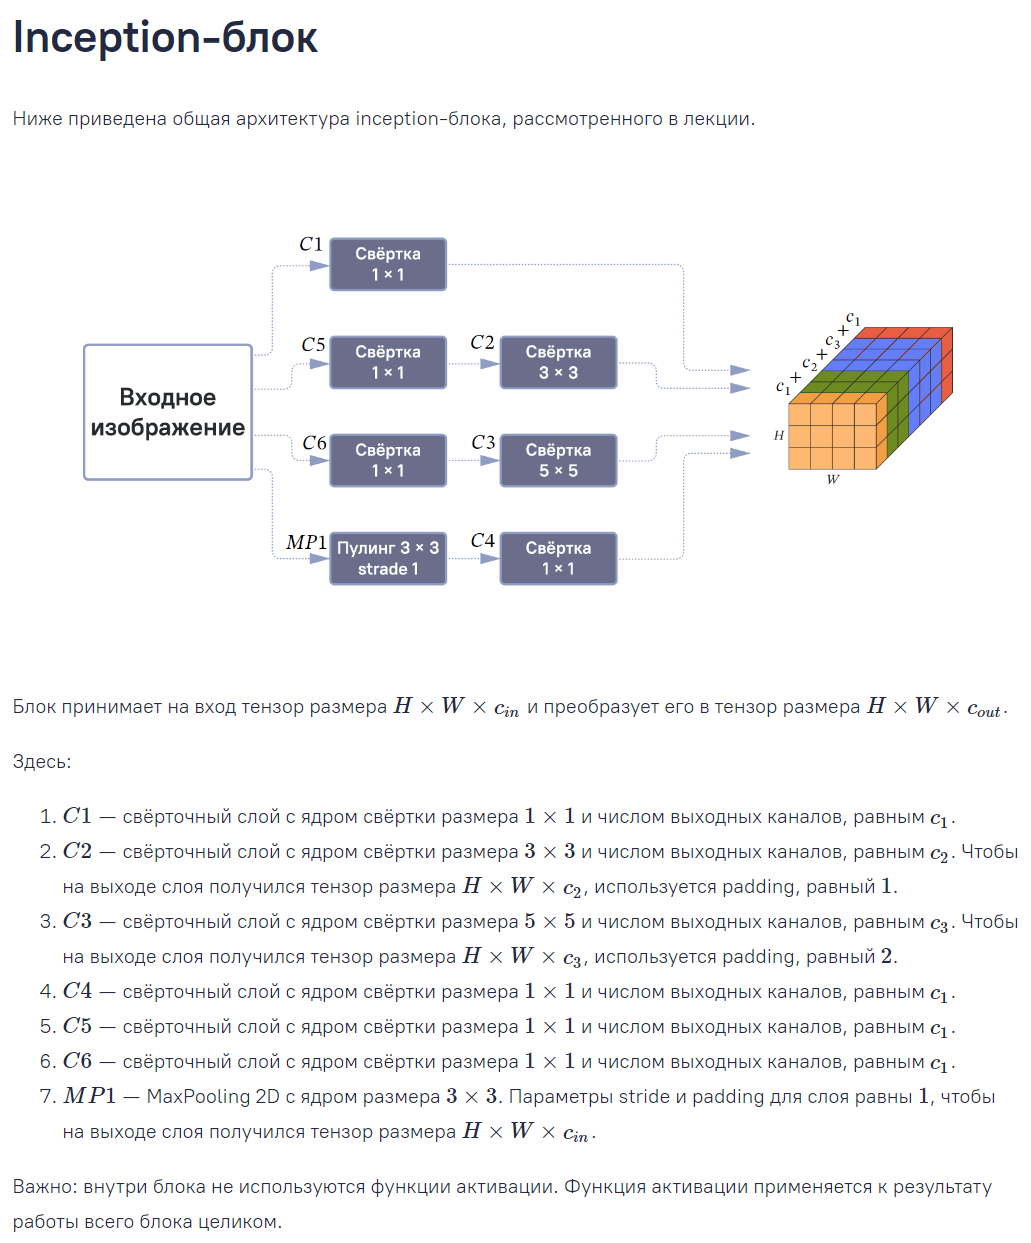

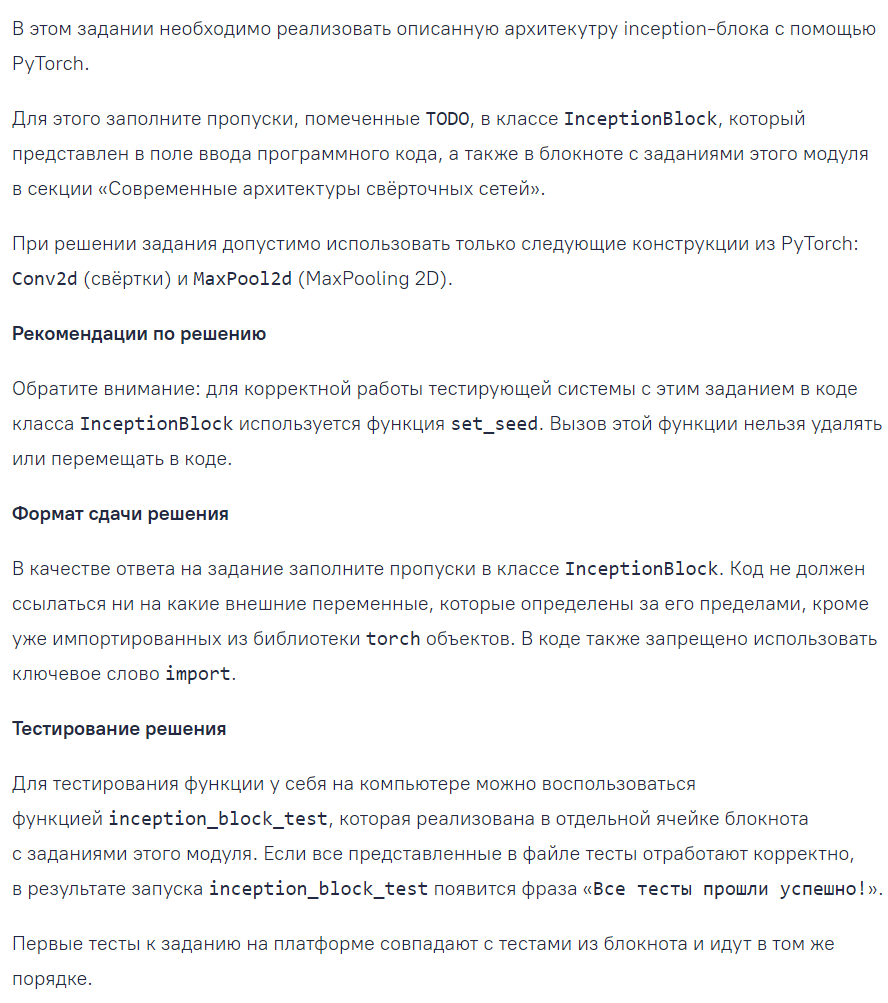

In [1]:
from torch.nn import Module, Sequential, Conv2d, MaxPool2d
from torch import cat

def set_seed():
    import random
    import numpy as np
    import torch
    
    SEED = 0

    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)

In [2]:
class InceptionBlock(Module):
    def __init__(self, c_in, c_1, c_3, c_5):
        # Необходимый для проверки корректности работы inception-блока код.
        set_seed()
        
        super().__init__()
        
        # TODO: Свёртка C1 размера 1x1.
        self.c1 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        
        # TODO: Свёртка C5 размера 1x1.
        self.c5 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        # TODO: Свёртка C2 размера 3x3. Параметр padding = 1.
        self.c2 = Conv2d(
            in_channels=c_1,
            out_channels=c_3,
            kernel_size=(3, 3),
            padding=1
        )
        
        # TODO: Свёртка C6 размера 1x1.
        self.c6 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        # TODO: Свёртка C3 размера 5x5. Параметр padding = 2.
        self.c3 = Conv2d(
            in_channels=c_1,
            out_channels=c_5,
            kernel_size=(5, 5),
            padding=2
        )
        
        # TODO: MaxPooling 2D MP1 размера 3x3. Параметры stride = 1, padding = 1.
        self.mp1 = MaxPool2d(
            kernel_size=(3, 3),
            stride=1,
            padding=1
        )
        # TODO: Свёртка C4 размера 1x1.
        self.c4 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        
        
        # Полная ветка блока со свёрткой 3x3.
        self.block_3_3 = Sequential(
            self.c5,
            self.c2,
        )
        
        # Полная ветка блока со свёрткой 5x5.
        self.block_5_5 = Sequential(
            self.c6,
            self.c3,
        )
        
        # Полная ветка блока с MaxPooling 2D.
        self.block_pool = Sequential(
            self.mp1,
            self.c4,
        )
    
    def forward(self, x):
        # В качестве результата работы inception-блок возвращает
        # соединение по размерности каналов результатов работы внутренних
        # свёрток и MaxPooling 2D.
        return cat([
            self.c1(x),
            self.block_3_3(x),
            self.block_5_5(x),
            self.block_pool(x),
        ], dim=1)

# DataLoader

In [4]:
import torch
from torchvision import datasets

download_dir = './dataset'

# Download train dataset
train_data = datasets.STL10(root=download_dir, download=True, split='train')

# Download val dataset
val_data = datasets.STL10(root=download_dir, download=True, split='test')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Normalization of train data
x_train = torch.tensor(train_data.data) / 255.
x_train.shape

torch.Size([5000, 3, 96, 96])

In [7]:
# Targets of 10 classes
y_train = torch.tensor(train_data.labels)
print(y_train.shape, y_train.min(), y_train.max(), sep='\n')

torch.Size([5000])
tensor(0, dtype=torch.uint8)
tensor(9, dtype=torch.uint8)


In [8]:
classes = train_data.classes
classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [9]:
# Validation X and y
x_val = torch.tensor(val_data.data) / 255.
y_val = torch.tensor(val_data.labels)

print(x_val.shape, y_val.shape, sep='\n')

torch.Size([8000, 3, 96, 96])
torch.Size([8000])


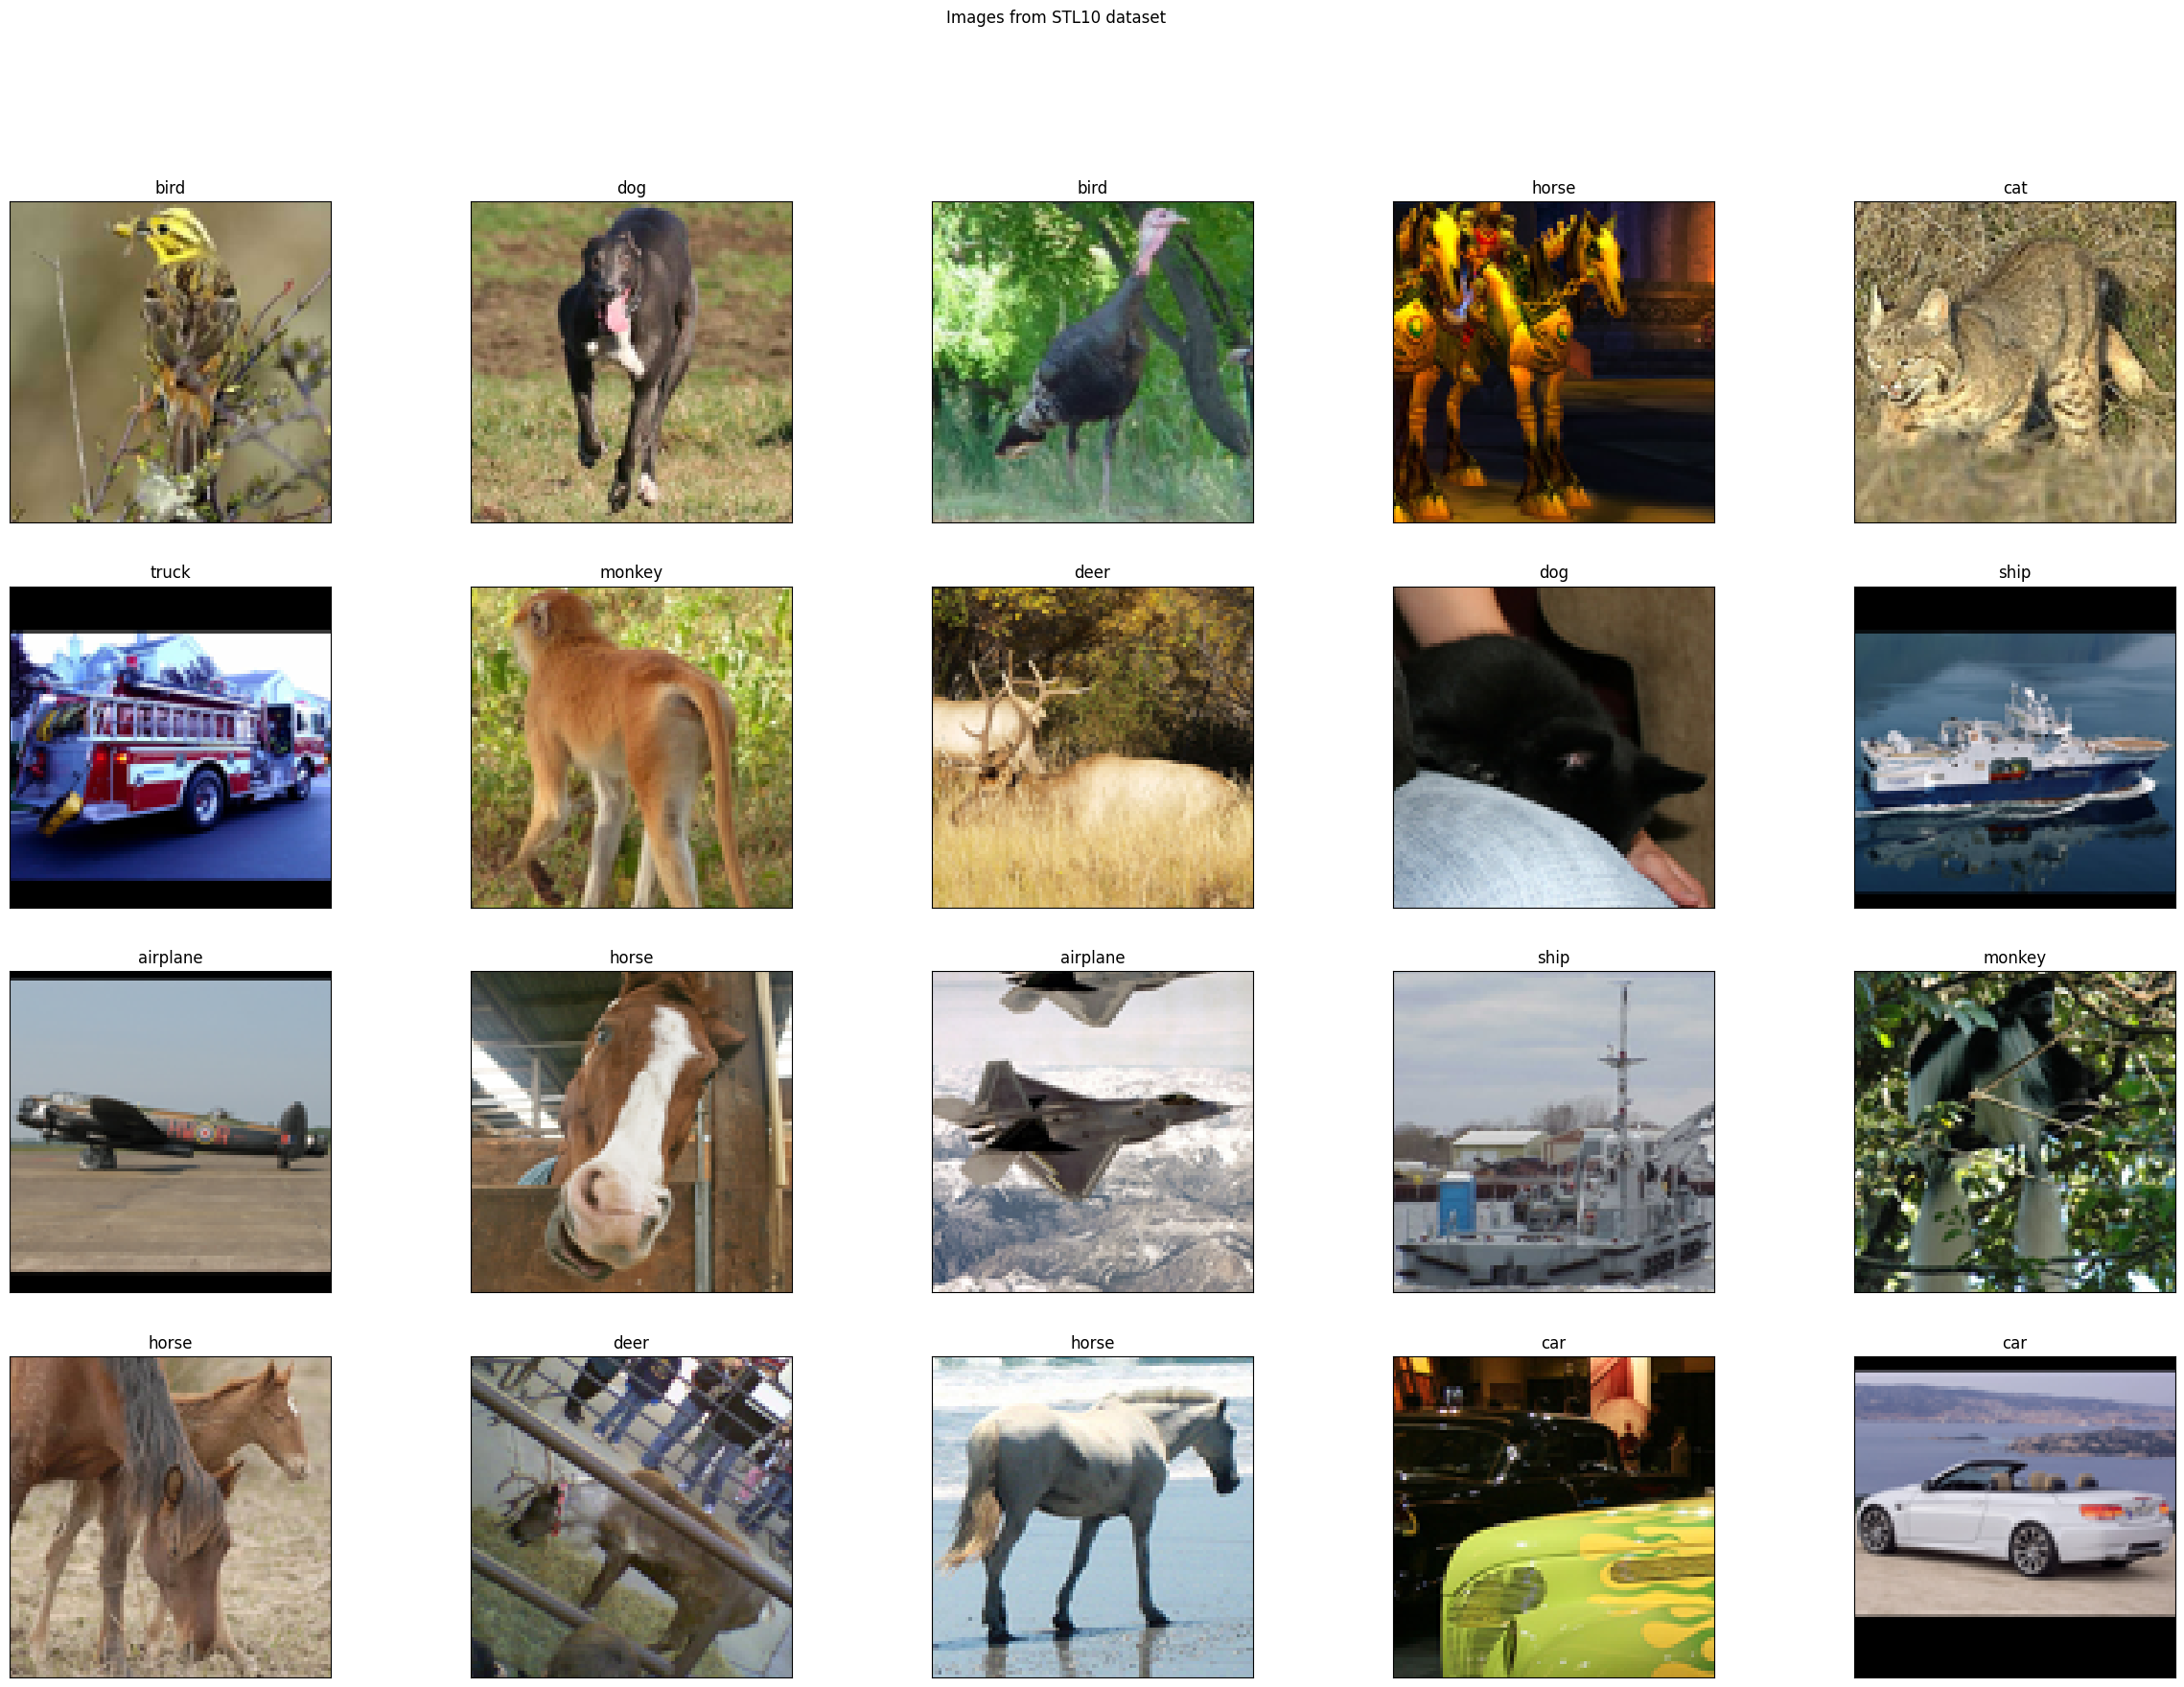

In [13]:
# Visualize data
import matplotlib.pyplot as plt

H = 4
W = 5

fig, ax = plt.subplots(H, W, figsize=(30, 5 * H))
fig.suptitle('Images from STL10 dataset')

for i, (x, y) in enumerate(zip(x_train, y_train)):
    if i >= H * W:
        break
        
    plt.subplot(H, W, i + 1)
    plt.imshow(x.permute(1, 2, 0))
    plt.xticks([])  # Remove coordinates from Ox axes
    plt.yticks([])
    plt.title(classes[y])
plt.show()

In [10]:
# My Dataset class (wrapper)
class MyDataset(torch.utils.data.Dataset):  # Inherited from Dataset class
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):  
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [11]:
train_dataset = MyDataset(x_train, y_train)
train_dataset

In [12]:
train_dataset[0]

(tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.6353, 0.6353, 0.6353],
          [0.5725, 0.5725, 0.5725,  ..., 0.6392, 0.6392, 0.6392],
          [0.5725, 0.5725, 0.5725,  ..., 0.6431, 0.6431, 0.6431],
          ...,
          [0.5098, 0.5176, 0.4588,  ..., 0.5373, 0.5882, 0.5529],
          [0.5255, 0.6078, 0.3451,  ..., 0.5294, 0.5333, 0.5373],
          [0.5294, 0.3804, 0.4549,  ..., 0.5412, 0.5765, 0.5412]],
 
         [[0.5608, 0.5608, 0.5608,  ..., 0.6235, 0.6235, 0.6235],
          [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
          [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
          ...,
          [0.4471, 0.4667, 0.4078,  ..., 0.5176, 0.5412, 0.4784],
          [0.4627, 0.5529, 0.2902,  ..., 0.5137, 0.4863, 0.4706],
          [0.4667, 0.3255, 0.4078,  ..., 0.4980, 0.5333, 0.5020]],
 
         [[0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ...,

In [14]:
# Wrapper whick helps not to point batchs manually
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=100,
    shuffle=True,  # Batchs always different
    drop_last=True
)

In [15]:
# Iterator with batch from data
for imgs, targets in train_dataloader:
    print(imgs.shape, targets.shape, sep='\n')
    break

torch.Size([100, 3, 96, 96])
torch.Size([100])


# Task 2
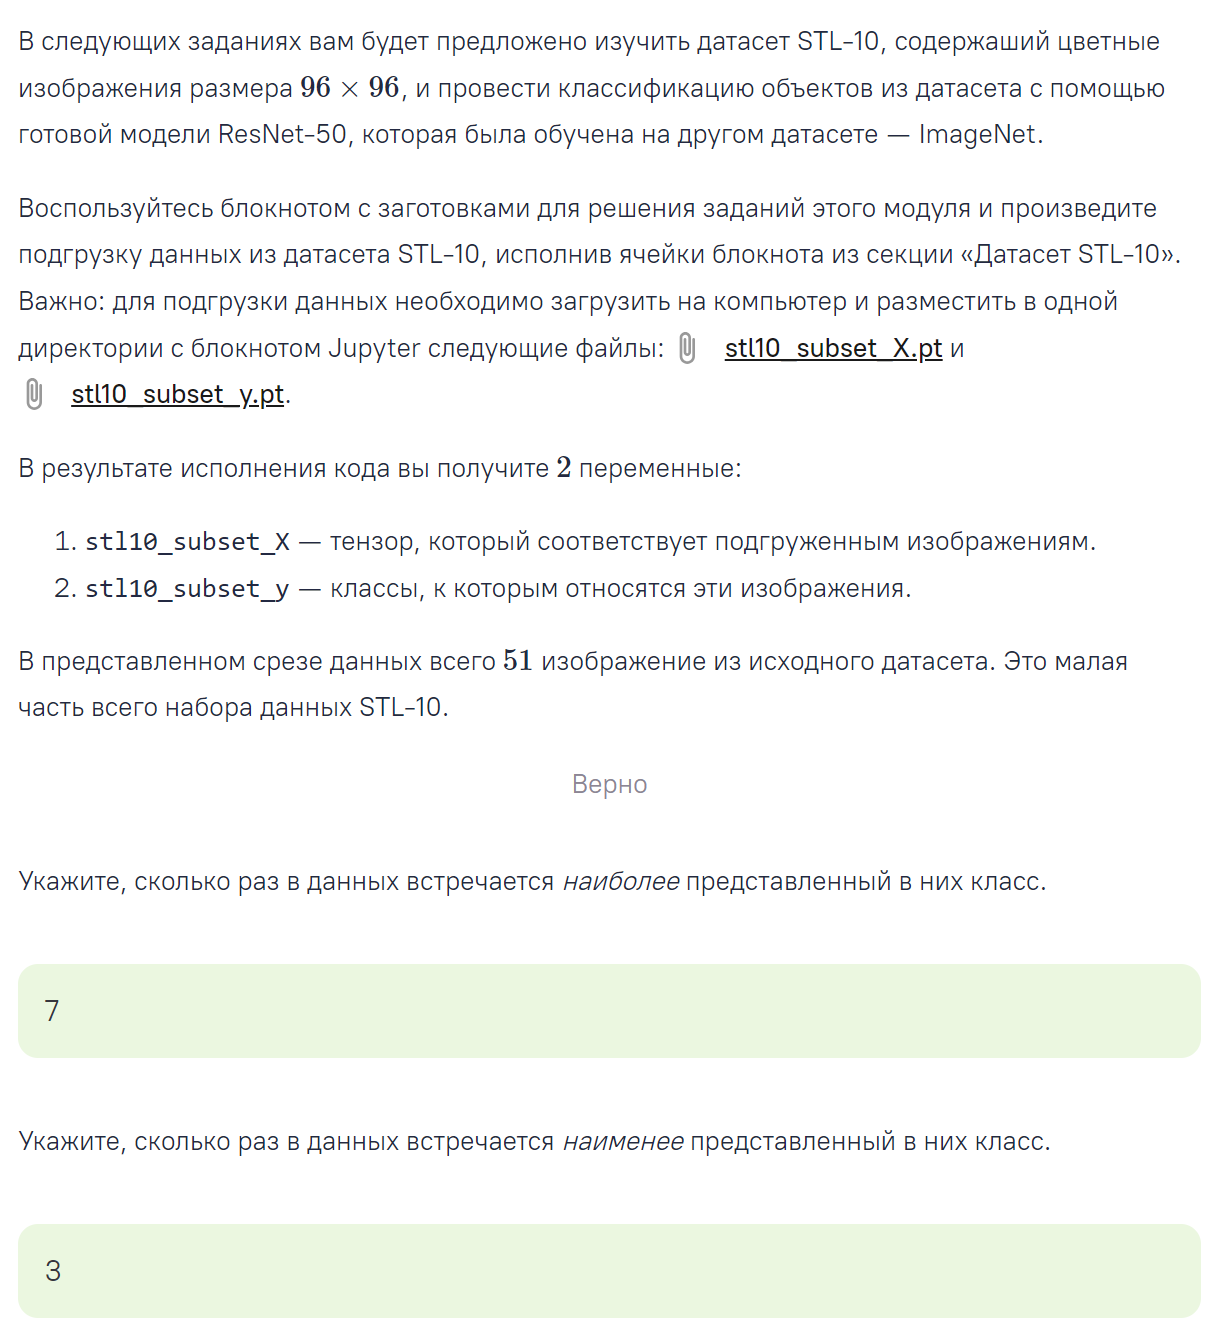

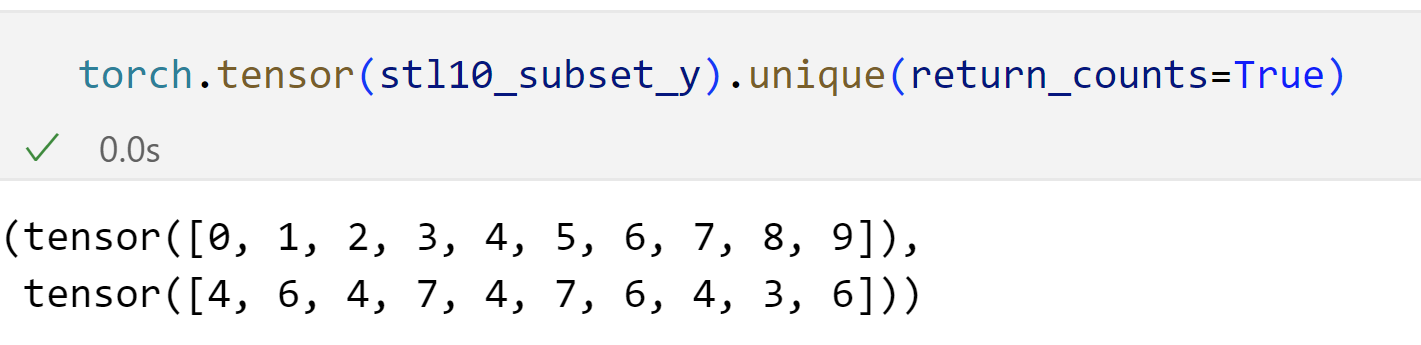